In [13]:
import pycbc
import gwpy
import numpy as np
import matplotlib.pyplot as plt

from numpy import random
from gwpy.timeseries import TimeSeries
from gwpy.frequencyseries import FrequencySeries


In [14]:
H1_1data = TimeSeries.read('H1_TEST1.hdf')
print(H1_1data)
pH1_1data = H1_1data.to_pycbc() #convert to pycbc TimeSeries
print(pH1_1data)

TimeSeries([2.53567919e-21, 1.18872265e-20, 2.72576599e-21, ...,
            2.63977026e-20, 8.27884215e-21, 3.20472696e-20]
           unit: dimensionless,
           t0: 0.0 s,
           dt: 0.00048828125 s,
           name: Strain,
           channel: H1:FAKE_2048)
[2.53567919e-21 1.18872265e-20 2.72576599e-21 ... 2.63977026e-20
 8.27884215e-21 3.20472696e-20]


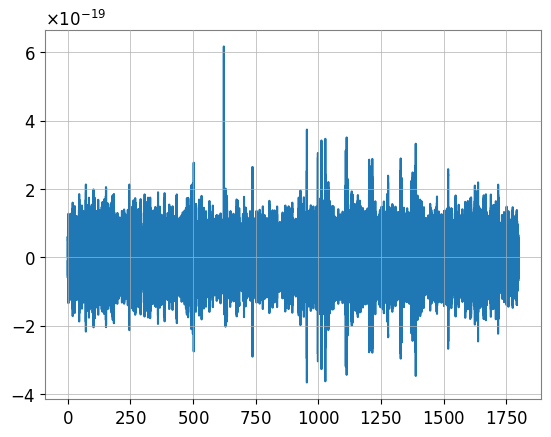

In [15]:
plot = pH1_1data.plot()

In [17]:
fft = H1_1data.fft()
print(fft)

FrequencySeries([ 6.53689051e-26+0.00000000e+00j,
                  1.30951603e-25+5.96539074e-29j,
                  1.30954530e-25-1.81959333e-29j, ...,
                  5.08972860e-26+1.65254522e-25j,
                 -6.99028196e-26+1.82627100e-26j,
                 -1.38129110e-25+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.0005555555555555556 Hz,
                epoch: 0.0,
                name: Strain,
                channel: H1:FAKE_2048)


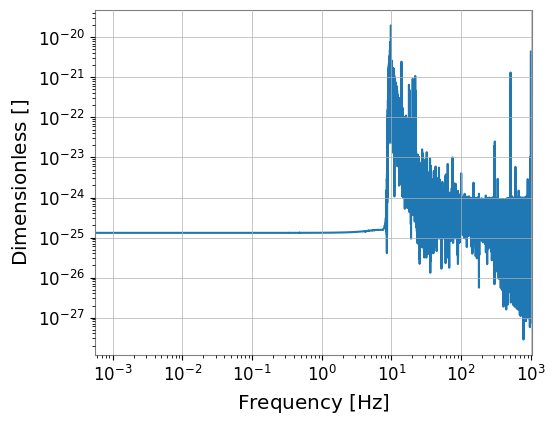

In [19]:
plot = fft.abs().plot(xscale="log", yscale="log")
plot.show(warn=False)

In [20]:
from scipy.signal import get_window

window = get_window('hann', H1_1data.size)
H1_1win = H1_1data * window

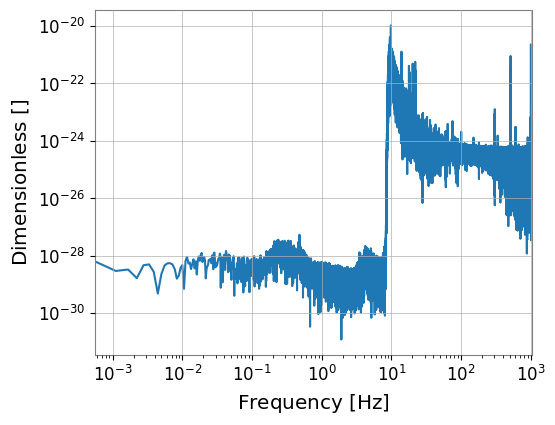

In [21]:
fftamp = H1_1win.fft().abs()
plot = fftamp.plot(xscale="log", yscale="log")
plot.show(warn=False)

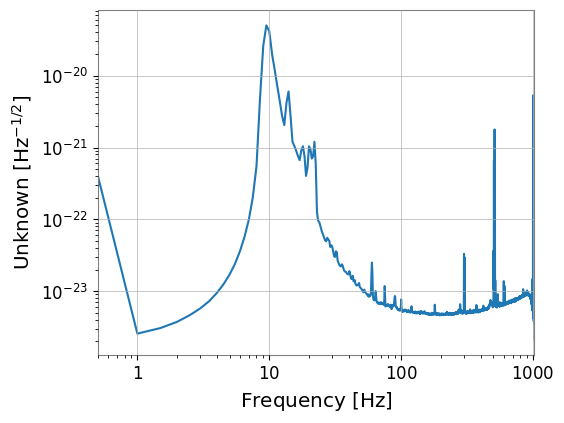

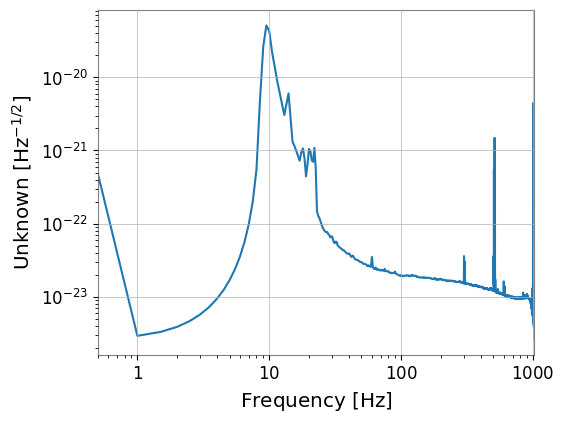

In [22]:
asd = H1_1data.asd(fftlength=2, method="median")
plot = asd.plot()
plot.show(warn=False)

asd = H1_1data.asd(fftlength=2, method="welch")
plot = asd.plot()
plot.show(warn=False)

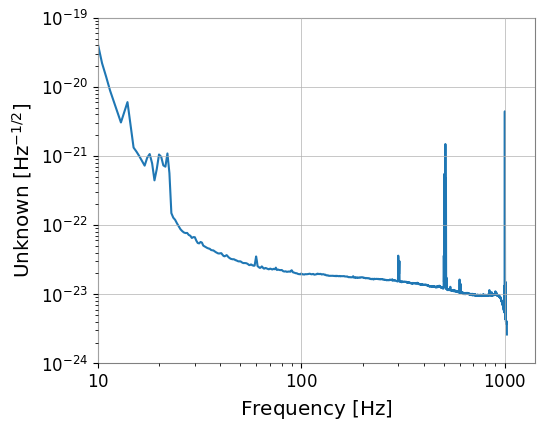

In [24]:
ax = plot.gca()
ax.set(xlim=(10, 1400), ylim=(1e-24, 1e-19))
plot

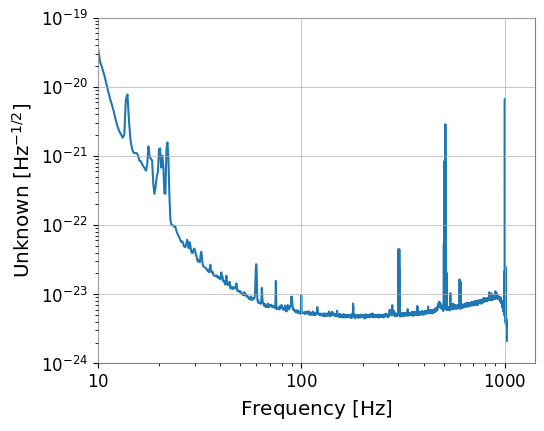

In [26]:
H1_2data = TimeSeries.read('H1_TEST1.hdf')
asd2 = H1_2data.asd(fftlength=4, method="median")
plot = asd2.plot()
ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(1e-24, 1e-19)
plot.show(warn=False)
